In [1]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import pandas as pd

In [2]:
image = img.imread(r'C:\Users\DEEPMITA RAY\Pictures\Screenshots\ironman.jpeg')
print(image)

[[[ 45  39  41]
  [ 45  39  41]
  [ 50  44  46]
  ...
  [ 41  26  29]
  [ 41  26  29]
  [ 46  31  34]]

 [[ 53  47  49]
  [ 52  46  48]
  [ 53  47  49]
  ...
  [ 43  28  31]
  [ 40  25  28]
  [ 44  29  32]]

 [[ 46  40  42]
  [ 47  41  43]
  [ 49  43  45]
  ...
  [ 43  28  31]
  [ 40  25  28]
  [ 41  26  29]]

 ...

 [[  9   8   6]
  [  8   7   5]
  [  7   6   4]
  ...
  [234 174 120]
  [225 164 110]
  [227 165 114]]

 [[  8   7   5]
  [  8   7   5]
  [  7   6   4]
  ...
  [242 182 128]
  [235 175 121]
  [238 178 124]]

 [[  9   8   6]
  [  9   8   6]
  [  9   8   6]
  ...
  [244 187 132]
  [239 179 125]
  [243 183 129]]]


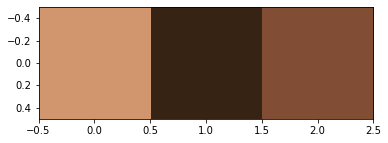

In [3]:
r = []
g = []
b = []
for row in image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

image_df = pd.DataFrame({'red' : r,
                          'green' : g,
                          'blue' : b})
 
image_df['scaled_color_red'] = whiten(image_df['red'])
image_df['scaled_color_blue'] = whiten(image_df['blue'])
image_df['scaled_color_green'] = whiten(image_df['green'])
 
cluster_centers, _ = kmeans(image_df[['scaled_color_red',
                                    'scaled_color_blue',
                                    'scaled_color_green']], 3)
 
dominant_colors = []
 
red_std, green_std, blue_std = image_df[['red',
                                          'green',
                                          'blue']].std()
 
for cluster_center in cluster_centers:
    red_scaled, green_scaled, blue_scaled = cluster_center
    dominant_colors.append((
        red_scaled * red_std / 255,
        green_scaled * green_std / 255,
        blue_scaled * blue_std / 255
    ))

plt.imshow([dominant_colors])
plt.show()